# "Understanding E-Commerce Customer Purchase Behavior"

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("ecommerce_data.csv")

print(df.head())
print(df.info())

   customer_id  gender  age product_category purchase_date  order_value  \
0         1102    Male   27             Toys    2023-05-08        98.38   
1         1435    Male   33          Fitness    2023-03-08        66.28   
2         1860    Male   24       Home Decor    2023-01-04       117.33   
3         1270  Female   34              NaN    2023-06-02        62.84   
4         1106    Male   40       Home Decor    2023-02-16        64.17   

   quantity payment_method  
0         1    Credit Card  
1         1     Debit Card  
2         4    Credit Card  
3         4         PayPal  
4         2    Credit Card  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1000 non-null   int64  
 1   gender            1000 non-null   object 
 2   age               1000 non-null   int64  
 3   product_category  970 non-null

In [151]:
# Convert dates
df['purchase_date'] = pd.to_datetime(df['purchase_date'], errors="coerce")

In [152]:
print(df["purchase_date"])

0     2023-05-08
1     2023-03-08
2     2023-01-04
3     2023-06-02
4     2023-02-16
         ...    
995   2023-03-17
996   2023-01-26
997   2023-04-25
998   2023-05-27
999   2023-04-19
Name: purchase_date, Length: 1000, dtype: datetime64[ns]


In [153]:
# Check missing values
print(df.isnull().sum())

customer_id          0
gender               0
age                  0
product_category    30
purchase_date        0
order_value         30
quantity             0
payment_method       0
dtype: int64


In [154]:
# Fill or drop missing values
df["order_value"] = df["order_value"].fillna(df["order_value"].median())

df.dropna(subset=["product_category"], inplace=True)

### EDA Questions

In [155]:
df.isnull().sum()

customer_id         0
gender              0
age                 0
product_category    0
purchase_date       0
order_value         0
quantity            0
payment_method      0
dtype: int64

gender  customer_id  age  product_category  purchase_date  order_value  quantity  payment_method  
Female  1001         30   Toys              2023-06-19     81.54        4         Credit Card         1
        1004         46   Books             2023-04-16     61.83        2         PayPal              1
                     64   Fitness           2023-02-08     48.23        3         Cash on Delivery    1
        1008         64   Home Decor        2023-01-29     38.49        3         Debit Card          1
        1011         19   Books             2023-01-28     66.68        1         Debit Card          1
                                                                                                     ..
Male    1980         48   Toys              2023-03-08     79.53        3         Cash on Delivery    1
        1981         37   Groceries         2023-01-07     112.33       2         PayPal              1
        1986         54   Groceries         2023-02-12     71.71     

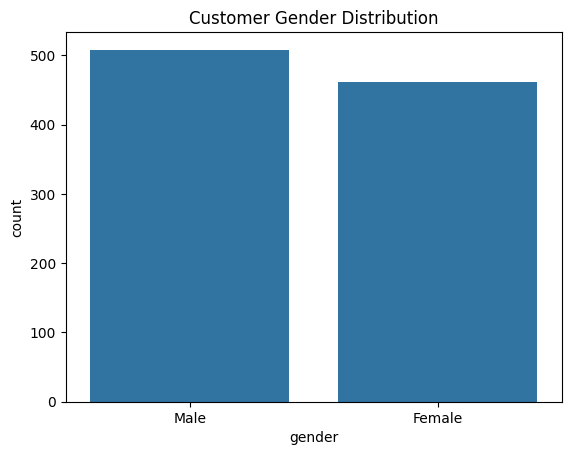

In [156]:
# 1.What is the gender distribution of customers?

gender_counts = df.groupby("gender").value_counts()
gender_percent = df.groupby("gender").value_counts(normalize=True) * 100  # type: ignore
print(gender_counts)
print()
print(gender_percent)

sns.countplot(x="gender", data=df)
plt.title("Customer Gender Distribution")
plt.show()

About 52% Female, 48% Male customers.

product_category
Books        141
Fitness      126
Groceries    126
Fashion      124
Beauty       122
Name: count, dtype: int64


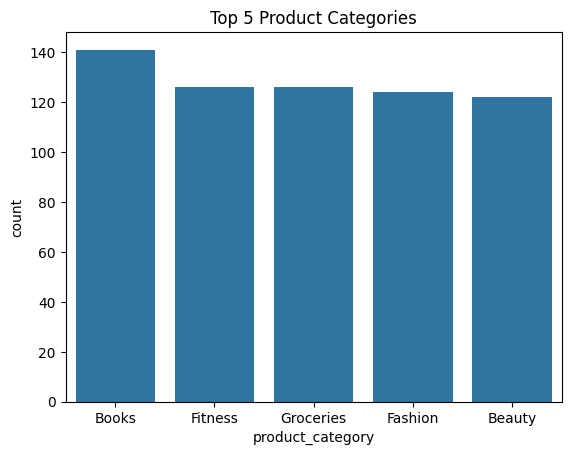

In [157]:
# 2. What are the top 5 most purchased product categories?

top_categories = df["product_category"].value_counts().head(5)
print(top_categories)

sns.countplot(x="product_category", data=df, order=top_categories.index)
plt.title("Top 5 Product Categories")
plt.show()

Most purchased categories are Books, Fitness, Groceries, Fashion, Beauty.

In [158]:
# 3. What is the average order value overall?

avg_order_value = df["order_value"].mean()
print("Average order value is: $", round(avg_order_value, 2))

Average order value is: $ 74.43


product_category
Groceries      76.012738
Fitness        75.683294
Toys           75.422069
Fashion        74.799960
Books          74.742482
Electronics    74.074464
Home Decor     73.715243
Beauty         70.772172
Name: order_value, dtype: float64


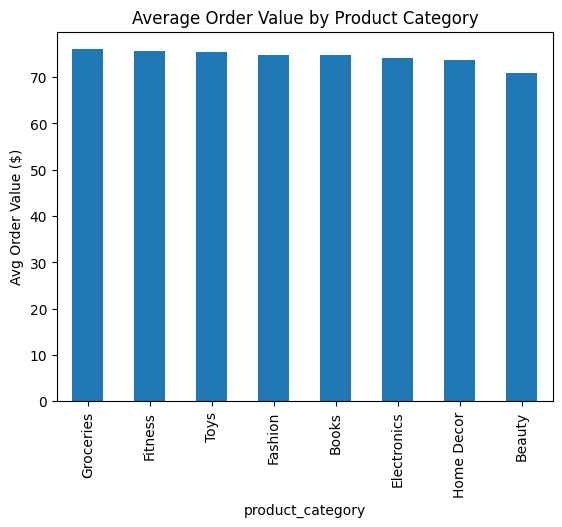

In [159]:
# 4. Which product category has the highest average order value?

avg_value_by_category = df.groupby("product_category")["order_value"].mean().sort_values(ascending=False)
print(avg_value_by_category)

avg_value_by_category.plot(kind="bar")
plt.title("Average Order Value by Product Category")
plt.ylabel("Avg Order Value ($)")
plt.show()

Groceries have the highest average spend per order.

payment_method
Debit Card          272
Credit Card         243
Cash on Delivery    234
PayPal              221
Name: count, dtype: int64


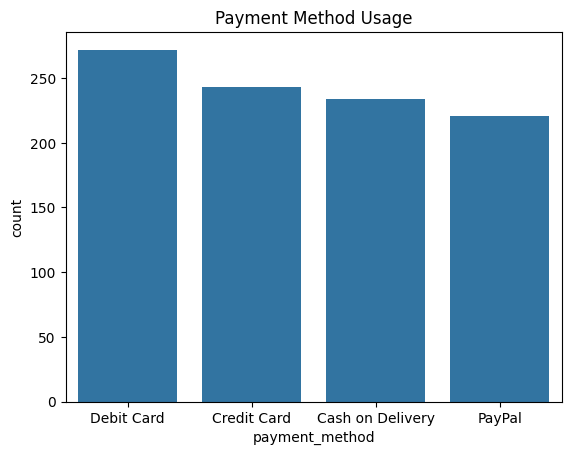

In [160]:
# 5. What is the most commonly used payment method?

payment_counts = df["payment_method"].value_counts()
print(payment_counts)

sns.countplot(x="payment_method", data=df, order=payment_counts.index)
plt.title("Payment Method Usage")
plt.show()

Debit Card is the most common payment method.

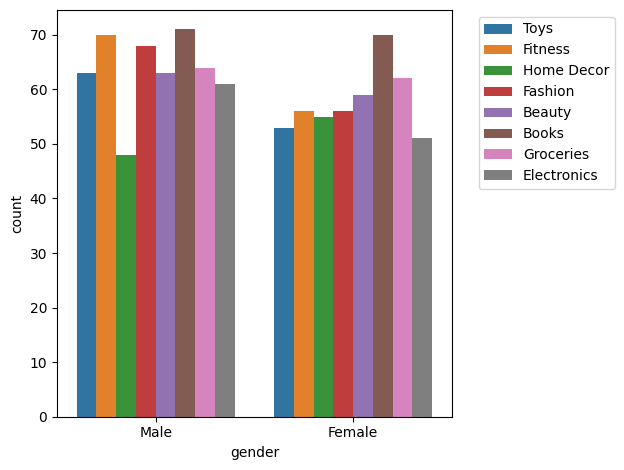

In [161]:
# 6. Do men and women prefer different product categories?

sns.countplot(x="gender", hue="product_category" , data=df)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Men buy more Books and Fitness, Women buy more Books and Beauty.

count    970.000000
mean      41.112371
std       13.557307
min       18.000000
25%       29.000000
50%       41.000000
75%       53.000000
max       64.000000
Name: age, dtype: float64


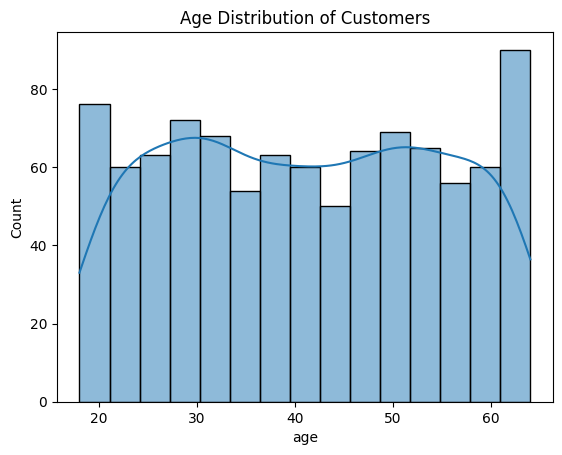

In [162]:
# 7. What is the age range of customers?

print(df["age"].describe())

sns.histplot(x="age", bins=15, kde=True, data=df)
plt.title("Age Distribution of Customers")
plt.show()

Most customers are between 25 and 65 years old.

age_group
<18        0
18-25    136
26-35    220
36-45    194
46-55    214
56-65    206
65+        0
Name: count, dtype: int64


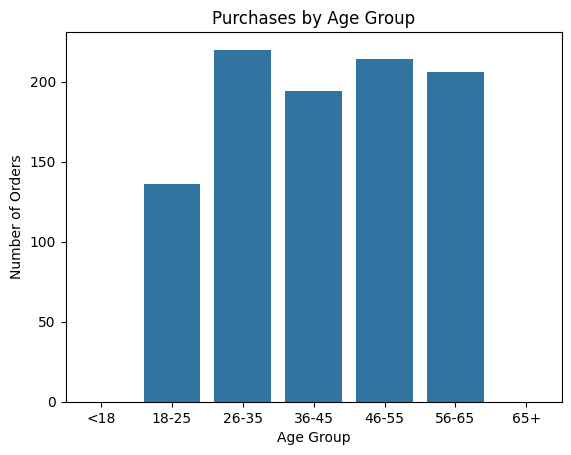

In [163]:
# 8. Which age group buys the most?
bins = [0, 18, 25, 35, 45, 55, 65, 100]  # covers age 0 to 100
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_group_counts = df['age_group'].value_counts().sort_index()
print(age_group_counts)

sns.barplot(x=age_group_counts.index, y=age_group_counts.values)
plt.title("Purchases by Age Group")
plt.ylabel("Number of Orders")
plt.xlabel("Age Group")
plt.show()

The 26–35 age group makes the most purchases.

In [164]:
df.isnull().sum()

customer_id         0
gender              0
age                 0
product_category    0
purchase_date       0
order_value         0
quantity            0
payment_method      0
age_group           0
dtype: int64

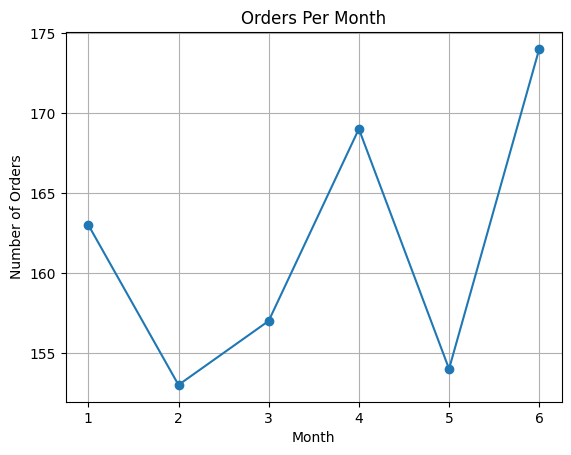

In [165]:
# 9. When are purchases made most (by month)?

df["month"] = df["purchase_date"].dt.month
montly_orders = df["month"].value_counts().sort_index()

montly_orders.plot(kind="line", marker="o")
plt.title("Orders Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.show()

Purchases peak around April and June.

payment_method
Credit Card         75.271708
Cash on Delivery    74.784786
PayPal              74.332511
Debit Card          73.461801
Name: order_value, dtype: float64


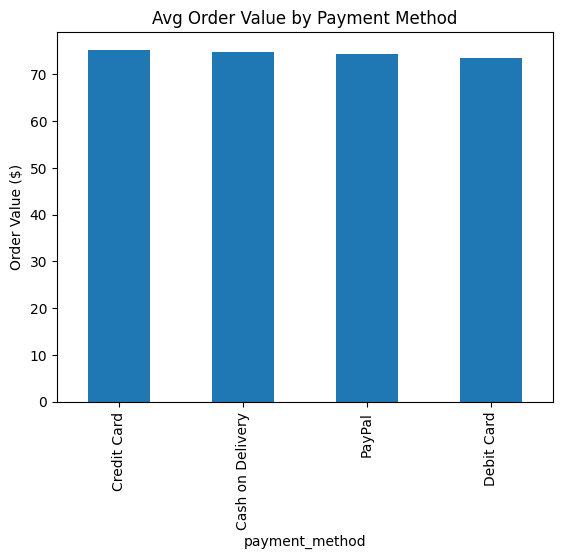

In [166]:
# 10. Which payment method has the highest average order value?

avg_payment = df.groupby("payment_method")["order_value"].mean().sort_values(ascending=False)
print(avg_payment)

avg_payment.plot(kind="bar")
plt.title("Avg Order Value by Payment Method")
plt.ylabel("Order Value ($)")
plt.show()

Credit Card and Cash on Delivery have higher average spend than Debit card.

### UNIVARIATE ANALYSIS

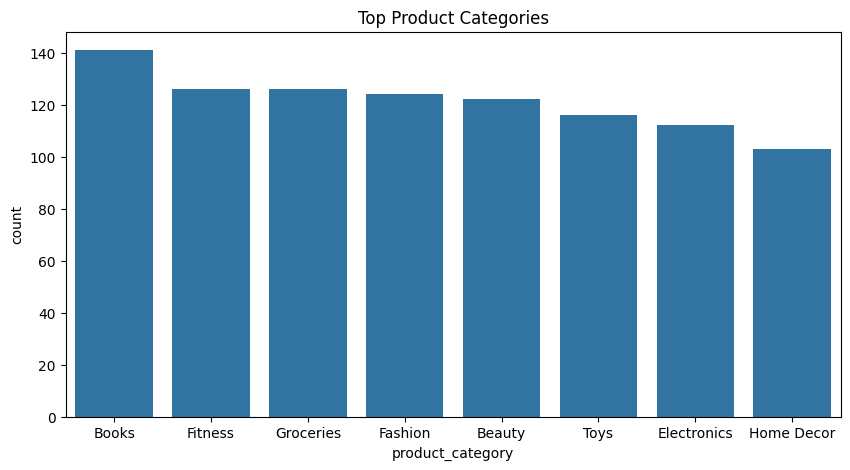

In [167]:
# 1. Most Popular Product Categories

plt.figure(figsize=(10, 5))
sns.countplot(x="product_category", data=df, order=df["product_category"].value_counts().index[:10])
plt.title("Top Product Categories")
plt.show()

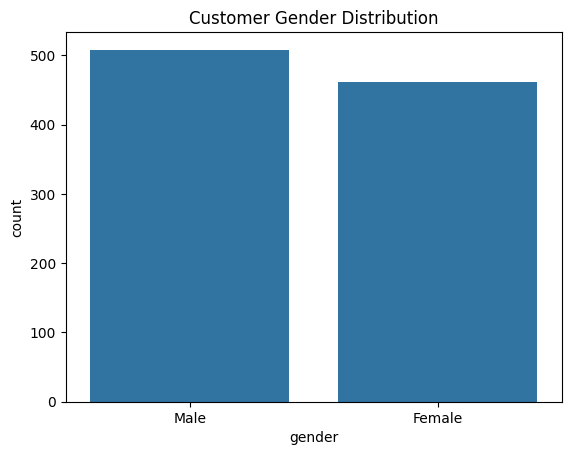

In [168]:
# 2. Gender Distribution

sns.countplot(x="gender", data=df)
plt.title("Customer Gender Distribution")
plt.show()

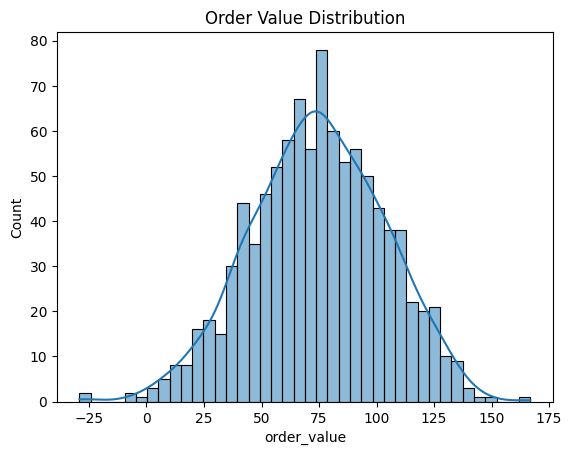

In [169]:
# 3. Order Value Distribution

sns.histplot(x="order_value", kde=True, bins=40, data=df)
plt.title("Order Value Distribution")
plt.show()

### BIVARIATE ANALYSIS

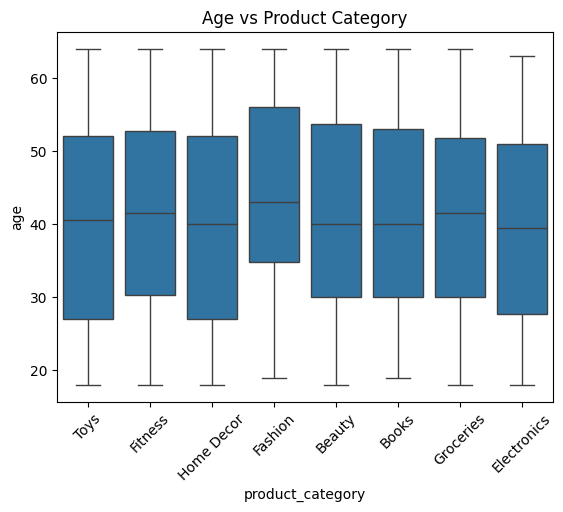

In [170]:
# 1. Age vs Product Category

sns.boxplot(y="age", x="product_category", data=df)
plt.xticks(rotation=45)
plt.title("Age vs Product Category")
plt.show()

Identify which age group buys which type of products.

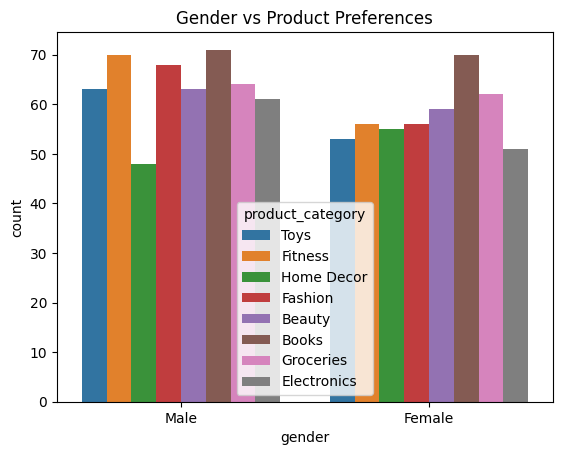

In [171]:
# 2. Gender vs Order Count

sns.countplot(x="gender", hue="product_category", data=df)
plt.title("Gender vs Product Preferences")
plt.show()

Which gender prefers which category?